In [161]:
#basic libraries
import os
import pandas as pd
import numpy as np
#visulaization modules
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
# loading data
data = pd.read_csv('hs_data.csv', delimiter = ',', encoding = 'utf-8')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [163]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [164]:
df2=data.copy()
df2["bmi"]

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

<Figure size 1500x1000 with 0 Axes>

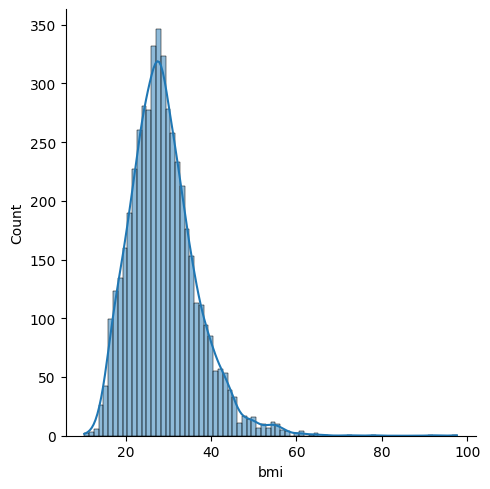

In [165]:
plt.figure(figsize=(15,10))
sns.displot(data = df2, x = "bmi", kde = True)

In [166]:
#filling the missings randomly
fill_list = data["bmi"].dropna()
df2 = data["bmi"].fillna(pd.Series(np.random.choice(fill_list, size = len(data.index))))
df2

0       36.6
1       25.1
2       32.5
3       34.4
4       24.0
        ... 
5105    31.3
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

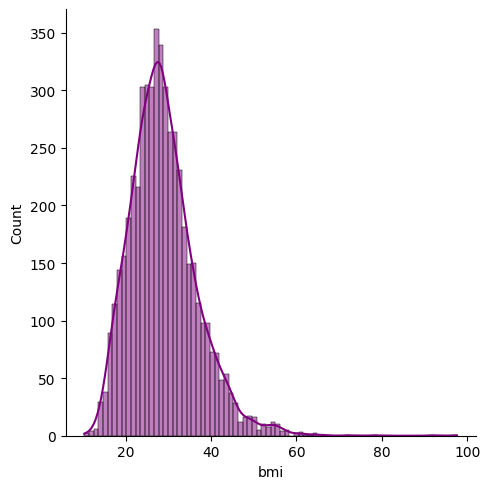

In [167]:
#checking the distribution after filling the missing values randomly
sns.displot(df2, kde = True, color = "Purple")

In [168]:
data["bmi"] = df2
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,25.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [169]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [170]:
data.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [171]:
data['smoking_status'] = data['smoking_status'].replace(['Unknown'],np.nan)
data.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                     0
smoking_status       1544
stroke                  0
dtype: int64

In [172]:
#filling the missings randomly
fill_list = data["smoking_status"].dropna()
df4 = data["smoking_status"].fillna(pd.Series(np.random.choice(fill_list, size = len(data.index))))
df4.head

<bound method NDFrame.head of 0       formerly smoked
1          never smoked
2          never smoked
3                smokes
4          never smoked
             ...       
5105       never smoked
5106       never smoked
5107       never smoked
5108    formerly smoked
5109       never smoked
Name: smoking_status, Length: 5110, dtype: object>

In [173]:
data = data.loc[(data["gender"] == "Male") | (data["gender"] == "Female") ]
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,25.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [174]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
gender_le = LabelEncoder()
data["gender"] = gender_le.fit_transform(data["gender"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_20152\3665535088.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["gender"] = gender_le.fit_transform(data["gender"])


In [175]:
data.gender.value_counts()

0    2994
1    2115
Name: gender, dtype: int64

In [176]:
evermarried_le = LabelEncoder()
data["ever_married"] = evermarried_le.fit_transform(data["ever_married"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_20152\1566033791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ever_married"] = evermarried_le.fit_transform(data["ever_married"])


In [177]:
data.ever_married.value_counts()

1    3353
0    1756
Name: ever_married, dtype: int64

In [178]:
worktype_le = LabelEncoder()
data["work_type"] = worktype_le.fit_transform(data["work_type"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_20152\4044297169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["work_type"] = worktype_le.fit_transform(data["work_type"])


In [179]:
data.work_type.value_counts()

2    2924
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64

In [180]:
residencetype_le = LabelEncoder()
data["Residence_type"] = residencetype_le.fit_transform(data["Residence_type"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_20152\504126701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Residence_type"] = residencetype_le.fit_transform(data["Residence_type"])


In [181]:
data.Residence_type.value_counts()

1    2596
0    2513
Name: Residence_type, dtype: int64

In [182]:
smoking_status_le = LabelEncoder()
data["smoking_status"] = smoking_status_le.fit_transform(data["smoking_status"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_20152\74346902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["smoking_status"] = smoking_status_le.fit_transform(data["smoking_status"])


In [183]:
data.smoking_status.value_counts()

1    1892
3    1544
0     884
2     789
Name: smoking_status, dtype: int64

In [184]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,0,1
1,51676,0,61.0,0,0,1,3,0,202.21,25.1,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,1,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,2,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,1,1


<AxesSubplot:>

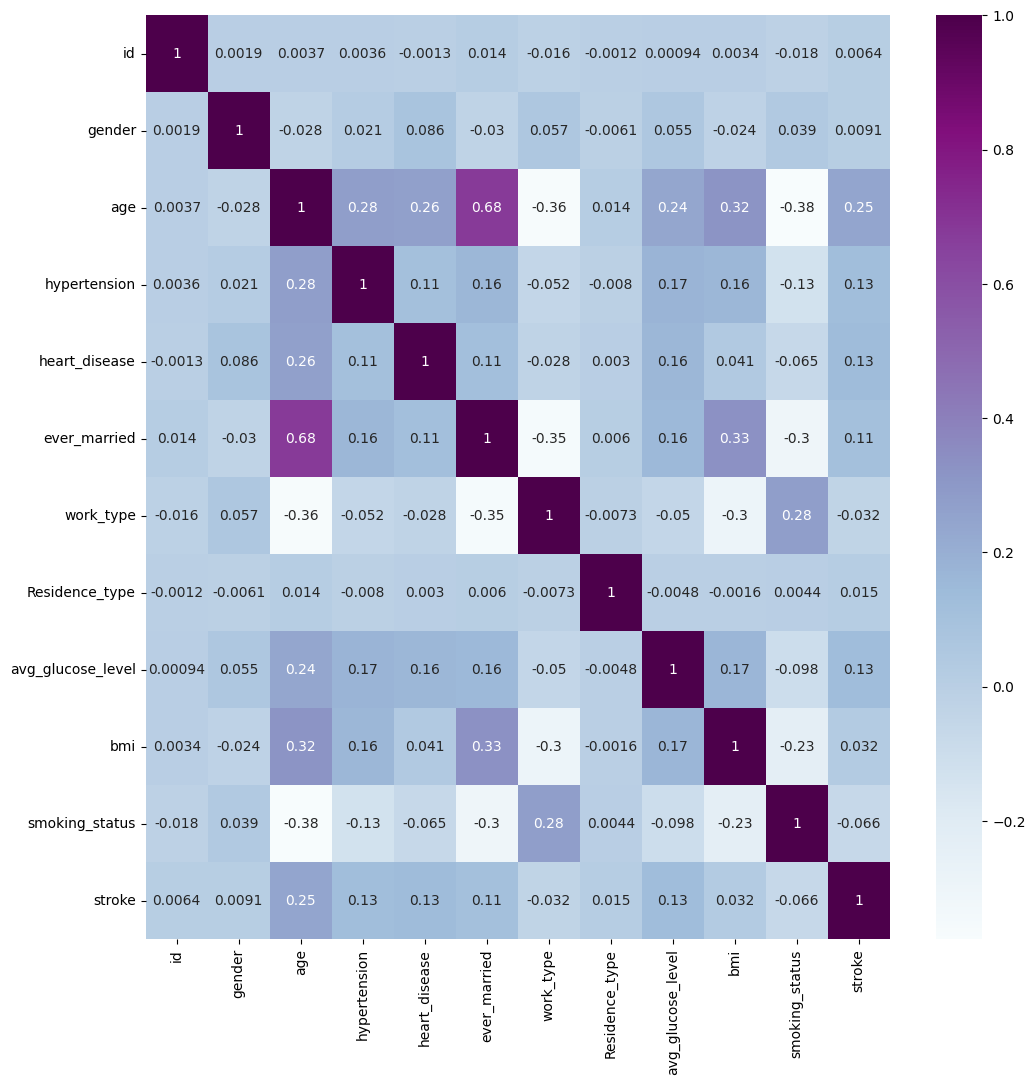

In [185]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,cmap="BuPu")

In [215]:
from sklearn.linear_model import LogisticRegression
l1=data[["age","avg_glucose_level","bmi"]]
l2=data["stroke"]

In [224]:
from sklearn.model_selection import train_test_split
xtr,xt,ytr,yt=train_test_split(l1,l2)

In [227]:
lm=LogisticRegression()
lm.fit(xt,yt)

LogisticRegression()

In [228]:
strokeper=lm.predict(xt)
strokeper.astype(float)

array([0., 0., 0., ..., 0., 0., 0.])

In [223]:
s=lm.predict([[23,105.92,32.5]])
s.astype(float)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.])

In [187]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, ShuffleSplit

relevant_data = data.drop("id", axis=1)
train_set, test_set = train_test_split(relevant_data, test_size=0.2, random_state=42)
print(train_set.shape)

(4087, 11)


In [188]:
training_labels = train_set["stroke"].copy().to_numpy()
training_features = train_set.drop("stroke", axis=1)

testing_labels = test_set["stroke"].copy()
testing_features = test_set.drop("stroke", axis=1)

In [189]:
# transform data using a pipeline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_attribs = ["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi"]
cat_attribs = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

num_pipeline = Pipeline([
     ('imputer', SimpleImputer(strategy="median")),
     ('std_scaler', StandardScaler())
])

pipeline = ColumnTransformer([
      ('num', num_pipeline, num_attribs),
      ("cat", OneHotEncoder(), cat_attribs)
])

training_features_prepared = pipeline.fit_transform(training_features)
training_features_prepared_df = pd.DataFrame(data=training_features_prepared)
training_features_prepared_df.head(5)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.588594,-0.32017,-0.230389,0.142703,-0.049072,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.836881,-0.32017,-0.230389,-0.392719,0.939701,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.976075,-0.32017,-0.230389,-1.026771,0.610110,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,-0.533891,-0.32017,-0.230389,-0.890714,0.191783,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,-0.533891,-0.32017,-0.230389,-1.024350,-1.139257,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [190]:
from sklearn.metrics import f1_score, balanced_accuracy_score, average_precision_score, precision_score, recall_score

def evaluate(model, features, labels):
  predictions = model.predict(features)

  mean_testing = np.mean(predictions == labels)
  print("Mean: " + str(mean_testing))
  recall_testing = recall_score(labels, predictions, average="binary", pos_label=1)
  print("Recall: " + str(recall_testing))
  precision_testing = precision_score(labels, predictions, average="binary", pos_label=1)
  print("Precision: " + str(precision_testing))
  f1_testing = f1_score(labels, predictions, average="binary", pos_label=1)
  print("F1 Score: " + str(f1_testing))

In [191]:
from sklearn.linear_model import LogisticRegression
# Train a Logistic Regression Classifier
logRes = LogisticRegression().fit(training_features_prepared, training_labels)
evaluate(logRes, training_features_prepared, training_labels)

Mean: 0.9544898458527037
Recall: 0.0053475935828877
Precision: 1.0
F1 Score: 0.010638297872340425


In [192]:
# Train a Support Vector Machine Classifier

from sklearn import svm

svc = svm.SVC(kernel="poly", random_state=42, probability=True)
svc.fit(training_features_prepared, training_labels)

SVC(kernel='poly', probability=True, random_state=42)

In [193]:
evaluate(svc, training_features_prepared, training_labels)
svc.predict_proba(training_features_prepared)

Mean: 0.9571813065818449
Recall: 0.0855614973262032
Precision: 0.8
F1 Score: 0.15458937198067632


array([[0.9536571 , 0.0463429 ],
       [0.95336345, 0.04663655],
       [0.95202111, 0.04797889],
       ...,
       [0.95325755, 0.04674245],
       [0.95299623, 0.04700377],
       [0.9519877 , 0.0480123 ]])

In [194]:
# Train a random forest classifier

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(training_features_prepared, training_labels)

RandomForestClassifier()

In [195]:
evaluate(rfc, training_features_prepared, training_labels)
rfc.predict_proba(training_features_prepared)

Mean: 1.0
Recall: 1.0
Precision: 1.0
F1 Score: 1.0


array([[0.93, 0.07],
       [0.98, 0.02],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01]])

In [196]:
# Train a Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(training_features_prepared, training_labels)

GradientBoostingClassifier()

In [197]:
evaluate(gbc, training_features_prepared, training_labels)
gbc.predict_proba(training_features_prepared)

Mean: 0.9603621238071935
Recall: 0.13368983957219252
Precision: 1.0
F1 Score: 0.2358490566037736


array([[0.83844315, 0.16155685],
       [0.9689094 , 0.0310906 ],
       [0.99625209, 0.00374791],
       ...,
       [0.99175045, 0.00824955],
       [0.99626824, 0.00373176],
       [0.98934451, 0.01065549]])

In [199]:
# SVC - Grid Search Cross Validation

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'degree': [2, 8, 18], "C": [0.5, 1, 5, 10, 20]},
    {'degree': [2, 8, 18], "C": [0.5, 1, 5, 10, 20]},
  ]

svc = svm.SVC(kernel="poly", random_state=42, probability=True)

svc_grid_search = GridSearchCV(svc, param_grid, cv=5,
                           scoring='recall',
                           return_train_score=True)

svc_grid_search.fit(training_features_prepared, training_labels)

GridSearchCV(cv=5,
             estimator=SVC(kernel='poly', probability=True, random_state=42),
             param_grid=[{'C': [0.5, 1, 5, 10, 20], 'degree': [2, 8, 18]},
                         {'C': [0.5, 1, 5, 10, 20], 'degree': [2, 8, 18]}],
             return_train_score=True, scoring='recall')

In [200]:
# SVC - Grid Search Results

svc_cvres = svc_grid_search.cv_results_
print("Best params:", svc_grid_search.best_params_)

for mean_score, params in zip(svc_cvres["mean_test_score"], svc_cvres["params"]):
    print(mean_score, params)

Best params: {'C': 5, 'degree': 18}
0.0 {'C': 0.5, 'degree': 2}
0.058748221906116636 {'C': 0.5, 'degree': 8}
0.07496443812233286 {'C': 0.5, 'degree': 18}
0.0 {'C': 1, 'degree': 2}
0.0534850640113798 {'C': 1, 'degree': 8}
0.07496443812233286 {'C': 1, 'degree': 18}
0.0 {'C': 5, 'degree': 2}
0.08008534850640113 {'C': 5, 'degree': 8}
0.09644381223328592 {'C': 5, 'degree': 18}
0.0 {'C': 10, 'degree': 2}
0.08549075391180655 {'C': 10, 'degree': 8}
0.09644381223328592 {'C': 10, 'degree': 18}
0.0 {'C': 20, 'degree': 2}
0.08563300142247511 {'C': 20, 'degree': 8}
0.09103840682788052 {'C': 20, 'degree': 18}
0.0 {'C': 0.5, 'degree': 2}
0.058748221906116636 {'C': 0.5, 'degree': 8}
0.07496443812233286 {'C': 0.5, 'degree': 18}
0.0 {'C': 1, 'degree': 2}
0.0534850640113798 {'C': 1, 'degree': 8}
0.07496443812233286 {'C': 1, 'degree': 18}
0.0 {'C': 5, 'degree': 2}
0.08008534850640113 {'C': 5, 'degree': 8}
0.09644381223328592 {'C': 5, 'degree': 18}
0.0 {'C': 10, 'degree': 2}
0.08549075391180655 {'C': 10, '

In [201]:
# RFC - Randomized Search Cross Validation

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=18),
    }

rfc = RandomForestClassifier()

rfc_rnd_search = RandomizedSearchCV(rfc, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='recall', random_state=42)

rfc_rnd_search.fit(training_features_prepared, training_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000011ABB32D4E0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000011AB668BC40>},
                   random_state=42, scoring='recall')

In [202]:
# RFC - Randomized Search Results

rfc_cvres = rfc_rnd_search.cv_results_
print("Best params:", rfc_rnd_search.best_params_)

for mean_score, params in zip(rfc_cvres["mean_test_score"], rfc_cvres["params"]):
    print(mean_score, params)

Best params: {'max_features': 15, 'n_estimators': 107}
0.016073968705547653 {'max_features': 7, 'n_estimators': 180}
0.026600284495021338 {'max_features': 15, 'n_estimators': 107}
0.010668563300142247 {'max_features': 8, 'n_estimators': 189}
0.016073968705547653 {'max_features': 7, 'n_estimators': 122}
0.015931721194879088 {'max_features': 11, 'n_estimators': 88}
0.005405405405405406 {'max_features': 4, 'n_estimators': 104}
0.010668563300142247 {'max_features': 3, 'n_estimators': 150}
0.010668563300142247 {'max_features': 2, 'n_estimators': 88}
0.021194879089615933 {'max_features': 12, 'n_estimators': 158}
0.015931721194879088 {'max_features': 6, 'n_estimators': 130}


In [203]:
# GBC - Grid Search Cross Validation

param_grid = [
    {'learning_rate': [0.1, 0.4, 0.7], "n_estimators": [50, 100, 300]},
    {'learning_rate': [0.1, 0.4, 0.7], "n_estimators": [50, 100, 300]},
  ]

gbc_2 = GradientBoostingClassifier()

gbc_grid_search = GridSearchCV(gbc_2, param_grid, cv=5,
                           scoring='recall',
                           return_train_score=True)

gbc_grid_search.fit(training_features_prepared, training_labels)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid=[{'learning_rate': [0.1, 0.4, 0.7],
                          'n_estimators': [50, 100, 300]},
                         {'learning_rate': [0.1, 0.4, 0.7],
                          'n_estimators': [50, 100, 300]}],
             return_train_score=True, scoring='recall')

In [204]:
# RFC - Randomized Search Results

gbc_cvres = gbc_grid_search.cv_results_
print("Best params:", gbc_grid_search.best_params_)

for mean_score, params in zip(gbc_cvres["mean_test_score"], gbc_cvres["params"]):
    print(mean_score, params)

Best params: {'learning_rate': 0.4, 'n_estimators': 100}
0.005405405405405406 {'learning_rate': 0.1, 'n_estimators': 50}
0.016073968705547653 {'learning_rate': 0.1, 'n_estimators': 100}
0.0267425320056899 {'learning_rate': 0.1, 'n_estimators': 300}
0.07012802275960171 {'learning_rate': 0.4, 'n_estimators': 50}
0.08065433854907539 {'learning_rate': 0.4, 'n_estimators': 100}
0.08051209103840683 {'learning_rate': 0.4, 'n_estimators': 300}
0.059032716927453766 {'learning_rate': 0.7, 'n_estimators': 50}
0.05362731152204836 {'learning_rate': 0.7, 'n_estimators': 100}
0.0694167852062589 {'learning_rate': 0.7, 'n_estimators': 300}
0.005405405405405406 {'learning_rate': 0.1, 'n_estimators': 50}
0.016073968705547653 {'learning_rate': 0.1, 'n_estimators': 100}
0.021337126600284494 {'learning_rate': 0.1, 'n_estimators': 300}
0.053911806543385496 {'learning_rate': 0.4, 'n_estimators': 50}
0.07524893314366998 {'learning_rate': 0.4, 'n_estimators': 100}
0.07510668563300142 {'learning_rate': 0.4, 'n_e

In [205]:
model = gbc_grid_search.best_estimator_
testing_features_prepared = pipeline.transform(testing_features)
evaluate(model, testing_features_prepared, testing_labels)

Mean: 0.9266144814090019
Recall: 0.08064516129032258
Precision: 0.21739130434782608
F1 Score: 0.11764705882352941


In [209]:
from sklearn.externals import joblib


full_pipeline = Pipeline([
    ("transformation", pipeline),
    ("classification", model)
])

full_pipeline.fit(training_features, training_labels)

print(full_pipeline.predict_proba(["Male", 67,0,1,"Yes", "Private","Urban",228.69, 36.6,"formerly smoked"]))

joblib.dump(full_pipeline, 'model.joblib')

ValueError: Expected 2D array, got 1D array instead:
array=['Male' 67 0 1 'Yes' 'Private' 'Urban' 228.69 36.6 'formerly smoked'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.